# 信息标记及提取方法

HTML

hyper text markup language

WWW

world wide web



In [32]:
import requests
from bs4 import BeautifulSoup 
from IPython.display import Image
import matplotlib.pyplot as plt

In [10]:
def add_pic(pic_name ):
    return (Image(filename='/Users/paxton615/Github_Personal/Notes/Notes/pics/html/'+pic_name))

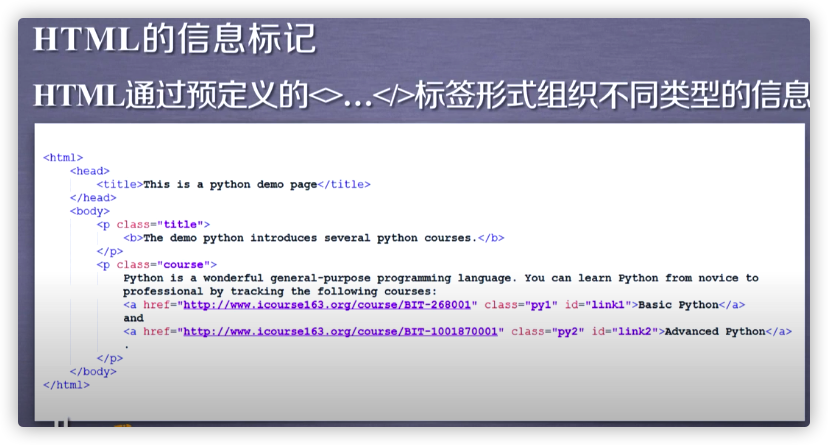

In [6]:
add_pic('html1.png')

### 国际公认的信息标记种类
1.XML
2.JSON
3.YAML

# xml

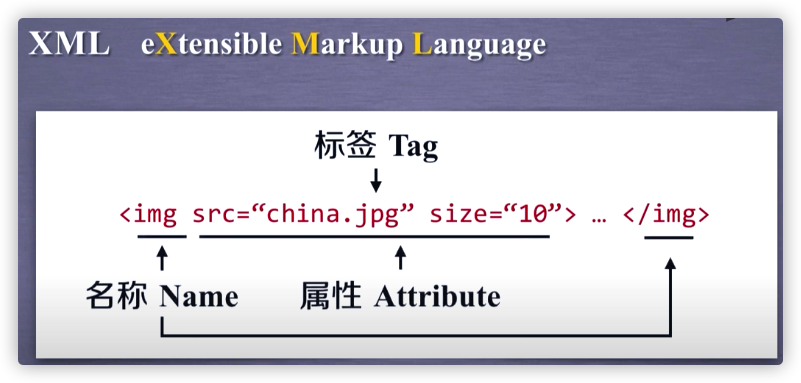

In [7]:
add_pic('xml1.png')

如果xml中没有内容，则以以下方式呈现

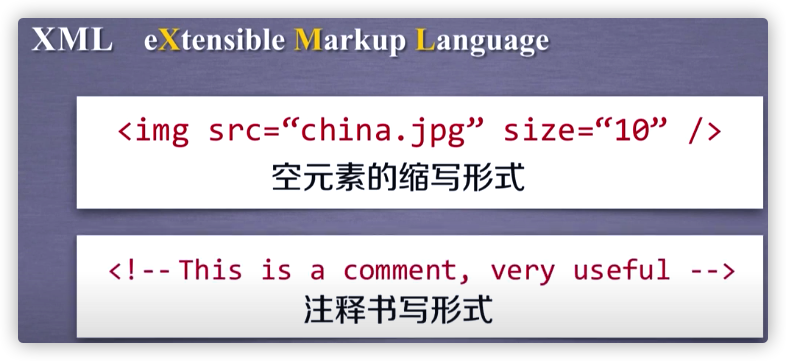

In [8]:
add_pic('xml2.png')

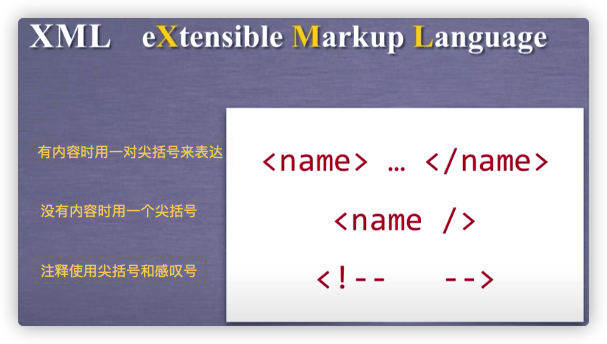

In [11]:
add_pic('xml3.png')

### xml是在html基础上发展起来的延伸标记方式

# JSON
JavaScript Object Notation

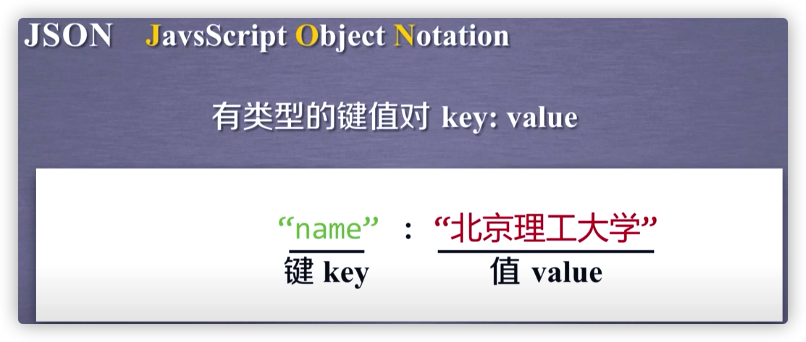

In [13]:
add_pic('JSON1.png')

无论是键还是值，都需要通过增加双引号的形式表达str，如是数字则不用加引号

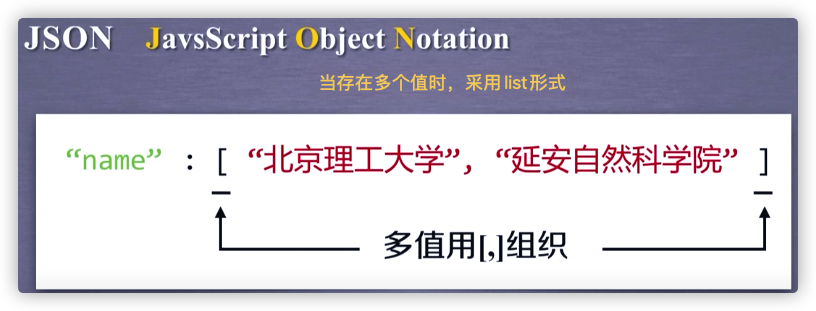

In [14]:
add_pic('json2.png')

如果键中还有多个键, 则采用大括号，如下

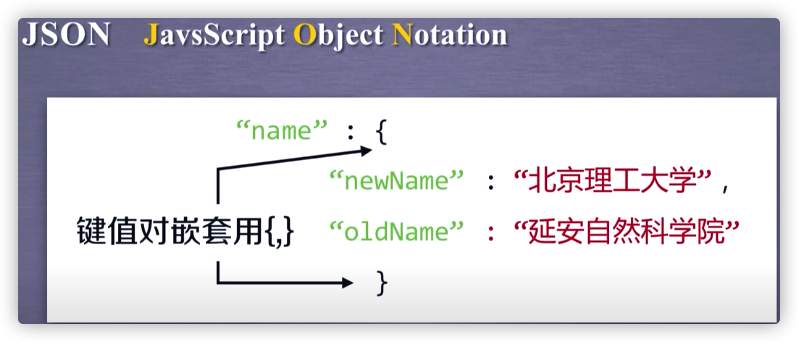

In [15]:
add_pic('json3.png')

# YAML

采用无类型的键值对儿

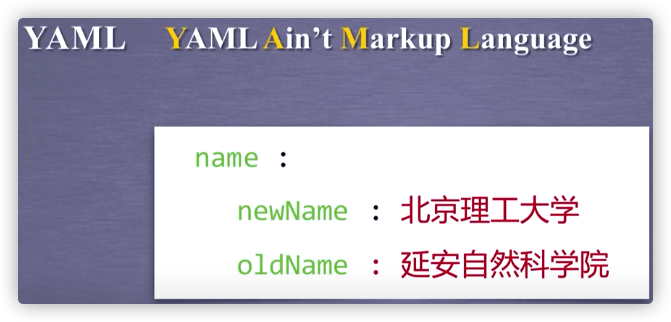

In [16]:
add_pic('yaml1.png')

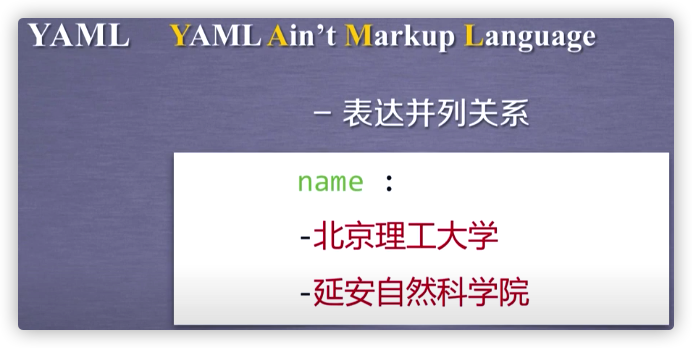

In [17]:
add_pic('yaml2.png')

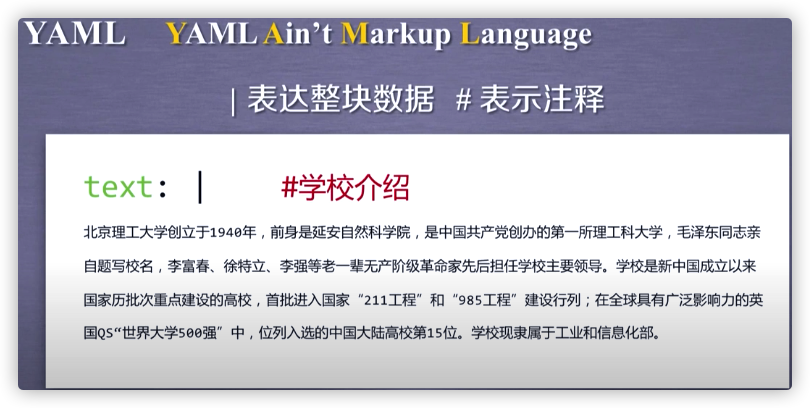

In [18]:
add_pic('yaml3.png')

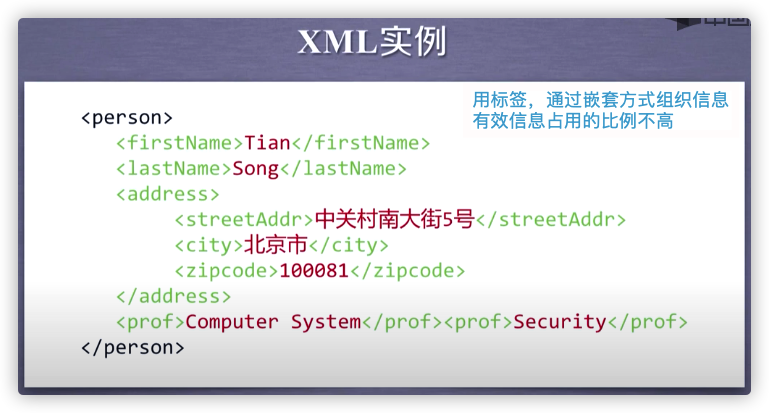

In [24]:
add_pic('xml11.png')

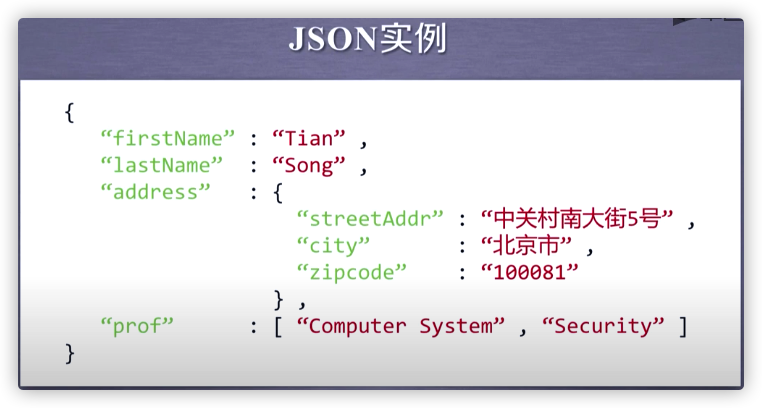

In [28]:
add_pic('json11.png')

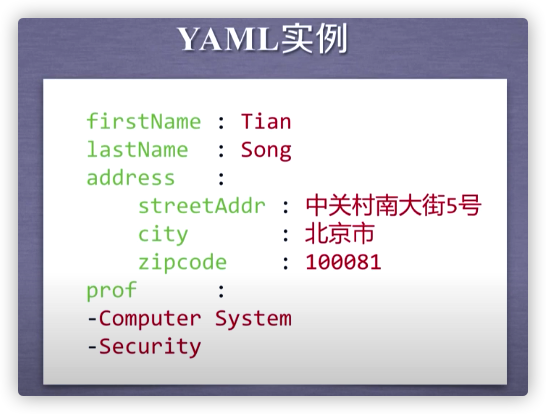

In [29]:
add_pic('yaml11.png')

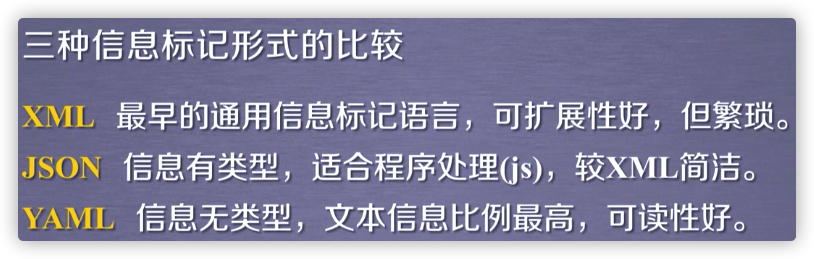

In [30]:
add_pic('compare1.png')

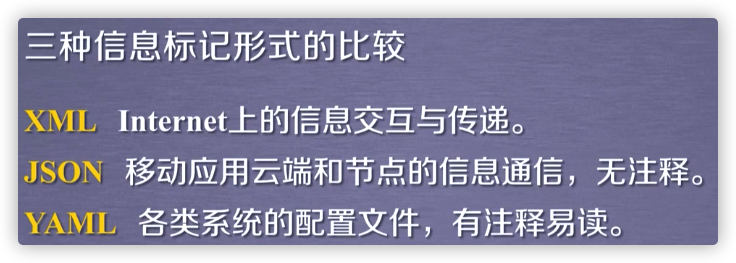

In [31]:
add_pic('compare2.png')

In [33]:
r = requests.get('http://python123.io/ws/demo.html')
print(r.status_code)
r.text

200


'<html><head><title>This is a python demo page</title></head>\r\n<body>\r\n<p class="title"><b>The demo python introduces several python courses.</b></p>\r\n<p class="course">Python is a wonderful general-purpose programming language. You can learn Python from novice to professional by tracking the following courses:\r\n<a href="http://www.icourse163.org/course/BIT-268001" class="py1" id="link1">Basic Python</a> and <a href="http://www.icourse163.org/course/BIT-1001870001" class="py2" id="link2">Advanced Python</a>.</p>\r\n</body></html>'

In [34]:
demo = r.text

In [35]:
soup = BeautifulSoup(demo , 'html.parser')

In [36]:
print(soup.prettify())

<html>
 <head>
  <title>
   This is a python demo page
  </title>
 </head>
 <body>
  <p class="title">
   <b>
    The demo python introduces several python courses.
   </b>
  </p>
  <p class="course">
   Python is a wonderful general-purpose programming language. You can learn Python from novice to professional by tracking the following courses:
   <a class="py1" href="http://www.icourse163.org/course/BIT-268001" id="link1">
    Basic Python
   </a>
   and
   <a class="py2" href="http://www.icourse163.org/course/BIT-1001870001" id="link2">
    Advanced Python
   </a>
   .
  </p>
 </body>
</html>


### find_all( )，在soup的变量中查找信息
从a标签中获取当中所有链接

In [37]:
for link in soup.find_all('a'):
    print(link.get('href'))

http://www.icourse163.org/course/BIT-268001
http://www.icourse163.org/course/BIT-1001870001


我们在仔细分步骤的来看看

In [41]:
for link in soup.find_all('a'):
    print(type(link)) 

<class 'bs4.element.Tag'>
<class 'bs4.element.Tag'>


In [42]:
for link in soup.find_all('a'):
    print(link) 

<a class="py1" href="http://www.icourse163.org/course/BIT-268001" id="link1">Basic Python</a>
<a class="py2" href="http://www.icourse163.org/course/BIT-1001870001" id="link2">Advanced Python</a>


In [43]:
soup.find('a')

<a class="py1" href="http://www.icourse163.org/course/BIT-268001" id="link1">Basic Python</a>

In [44]:
soup.find_all('a')

[<a class="py1" href="http://www.icourse163.org/course/BIT-268001" id="link1">Basic Python</a>,
 <a class="py2" href="http://www.icourse163.org/course/BIT-1001870001" id="link2">Advanced Python</a>]

In [45]:
soup.find(['a','b'])

<b>The demo python introduces several python courses.</b>

In [46]:
soup.find_all(['a','b'])

[<b>The demo python introduces several python courses.</b>,
 <a class="py1" href="http://www.icourse163.org/course/BIT-268001" id="link1">Basic Python</a>,
 <a class="py2" href="http://www.icourse163.org/course/BIT-1001870001" id="link2">Advanced Python</a>]

###  打印出所有标签

In [48]:
for tag in soup.find_all(True):
    print(tag.name)

html
head
title
body
p
b
p
a
a


In [68]:
for name in soup.a:
    print(name)

Basic Python


### 使用正则表达式打印出只含有b开头的标签

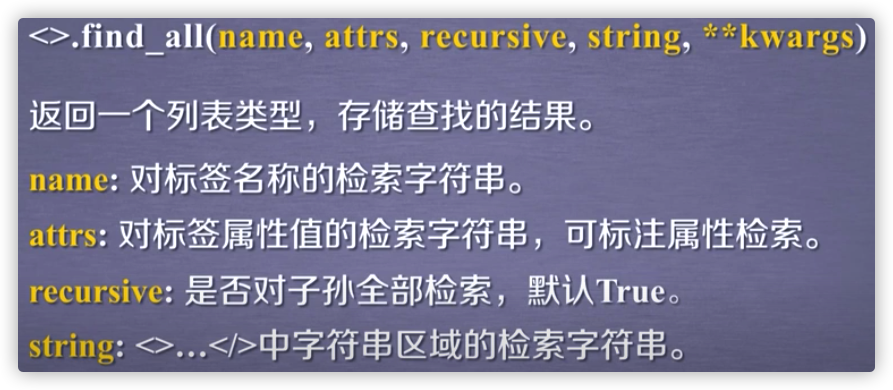

In [154]:
add_pic('find_all1.png')

<>.find_all(name)

In [49]:
import re
for tag in soup.find_all(re.compile('b')): #只含有b开头的标签
    print(tag.name)

body
b


<>.find_all(attrs)

In [65]:
soup.find_all('a','py1') 

[<a class="py1" href="http://www.icourse163.org/course/BIT-268001" id="link1">Basic Python</a>]

In [66]:
soup.find_all('p','py1')  
# py1是属于a标签的，尽管a是p的子标签,但因为不配套，所以还是找不到

[]

In [60]:
soup.find_all('p', 'course') 
# p是tag， course是class，两个参数缺一不可，在尖括号中它们也是在一起的

[<p class="course">Python is a wonderful general-purpose programming language. You can learn Python from novice to professional by tracking the following courses:
 <a class="py1" href="http://www.icourse163.org/course/BIT-268001" id="link1">Basic Python</a> and <a class="py2" href="http://www.icourse163.org/course/BIT-1001870001" id="link2">Advanced Python</a>.</p>]

In [61]:
soup.find_all( id = 'link1') 
# id是唯一的，可以单独进行查找, 但输入必须准确

[<a class="py1" href="http://www.icourse163.org/course/BIT-268001" id="link1">Basic Python</a>]

In [63]:
soup.find_all(class = 'py1')

SyntaxError: invalid syntax (<ipython-input-63-35496d5b5970>, line 1)

In [69]:
# 借助正则表达式，可以对attributes进行模糊搜索
soup.find_all( id=re.compile('link')) 

[<a class="py1" href="http://www.icourse163.org/course/BIT-268001" id="link1">Basic Python</a>,
 <a class="py2" href="http://www.icourse163.org/course/BIT-1001870001" id="link2">Advanced Python</a>]

In [70]:
soup.find_all('p', re.compile('cour')) 
# p是tag， course是class，两个参数缺一不可，在尖括号中它们也是在一起的
# attribute一定要是直接隶属标签的，不能有父子关系

[<p class="course">Python is a wonderful general-purpose programming language. You can learn Python from novice to professional by tracking the following courses:
 <a class="py1" href="http://www.icourse163.org/course/BIT-268001" id="link1">Basic Python</a> and <a class="py2" href="http://www.icourse163.org/course/BIT-1001870001" id="link2">Advanced Python</a>.</p>]

<>.find_all(recursive)

In [118]:
soup.p.find_all('b', recursive=False)
# 进行了两次尝试，对body和p标签做的。body对true,false设定反馈都一样。p因为其下
# 包含b，a两个标签分支，默认只显示了b这一个儿子标签
# 还需要继续理解这个参数，和标签之间的结构

[<b>The demo python introduces several python courses.</b>]

### 注意find_all( )的用法：例子，soup.find_all( 'p' ) 和 soup.p.find_all( 'b' ), 定位上的不同。

<>.find_all(string = '')

In [155]:
soup.find_all(string = 'Basic Python') 
# str的输入一定要精确，否则可用正则式子

['Basic Python']

In [156]:
soup.find_all(string = re.compile('python'))

['This is a python demo page',
 'The demo python introduces several python courses.']

In [157]:
soup.find_all(string = re.compile('Python'))

['Python is a wonderful general-purpose programming language. You can learn Python from novice to professional by tracking the following courses:\r\n',
 'Basic Python',
 'Advanced Python']

In [160]:
# 问题，有没有大小写模糊搜索的方法？

#### 但是能看出来，P，p依然是要区分的。

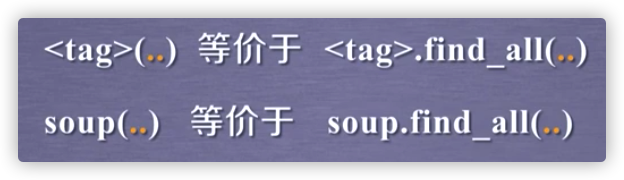

In [161]:
add_pic('find_all2.png')

In [162]:
soup.p('b')

[<b>The demo python introduces several python courses.</b>]

In [163]:
soup('a')

[<a class="py1" href="http://www.icourse163.org/course/BIT-268001" id="link1">Basic Python</a>,
 <a class="py2" href="http://www.icourse163.org/course/BIT-1001870001" id="link2">Advanced Python</a>]

In [165]:
soup.body('p',recursive=False)

[<p class="title"><b>The demo python introduces several python courses.</b></p>,
 <p class="course">Python is a wonderful general-purpose programming language. You can learn Python from novice to professional by tracking the following courses:
 <a class="py1" href="http://www.icourse163.org/course/BIT-268001" id="link1">Basic Python</a> and <a class="py2" href="http://www.icourse163.org/course/BIT-1001870001" id="link2">Advanced Python</a>.</p>]

find_all 其他扩展方法

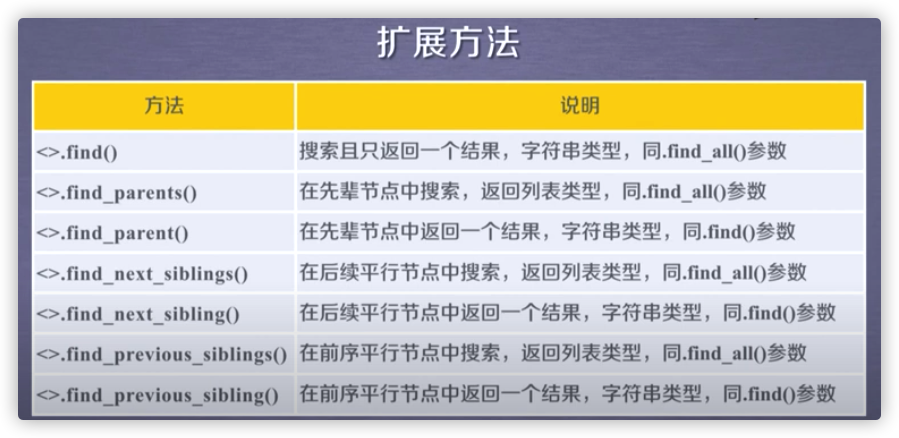

In [166]:
add_pic('find_all3.png')

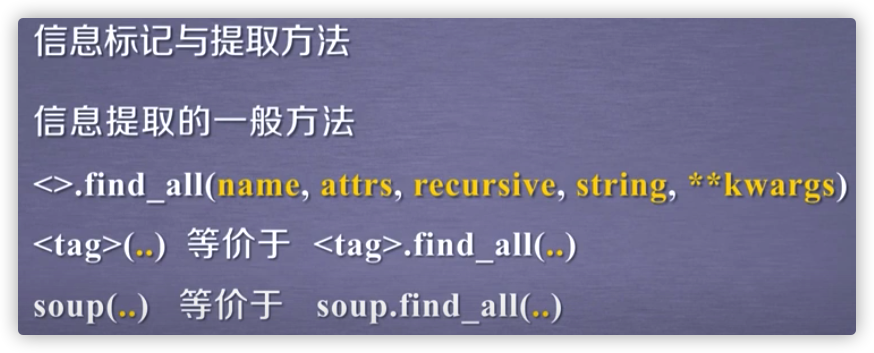

In [168]:
add_pic('find_all4.png')